<a href="https://colab.research.google.com/github/yumeniown/attestation_1/blob/main/%D0%BF%D1%80%D0%90%D1%82%D1%821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Популярные статьи на Хабре - https://www.kaggle.com/competitionshowpop-habrahabr-favs/data?select=howpop_train.csv

Файл howpop_train.csv(также есть на платформе)
1. Проведите первичный анализ данных
* Изучите данные
* Обработайте пропуски
* Преобразуйте признаки, если требуются
* Постройте графики для общего понимания о данных
2. Проверьте данные на нормальность(2-3 стобца)
* Объясните выбор теста
3. Выдвинете гипотезу(минимум 2), проверьте ее, не
забывая объясняя свой выбор
После каждой обработки данных/графика/теста обязательно
вывод
Сдавать ссылка на колаб + файл

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount
cwd = os.getcwd()
print(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


1. Проведем первичный анализ.

1.1 Изучим данные

In [ ]:
df = pd.read_csv('drive/MyDrive/howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [ ]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000,5.182821,4.872866,3.900973


После осведомления о столбцах, типах данных и о распределении числовых признаков пойдем далее.

1.2.Обработайте пропуски

In [ ]:
# проверим пропуски
df.isnull().sum()


,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


In [ ]:
# разделим столбцы на числовые и строковые
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# заполним пропуски в числовых столбцах медианой
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# заполним пропуски в строковых столбцах пустыми строками
df[categorical_columns] = df[categorical_columns].fillna('Unknown')


In [ ]:
# проверим пропуски
df.isnull().sum()


,0
url,0
domain,0
post_id,0
published,0
author,0
flow,0
polling,0
content_len,0
title,0
comments,0


все значения пропусков устранены.

1.3. Постройте графики для общего понимания о данных

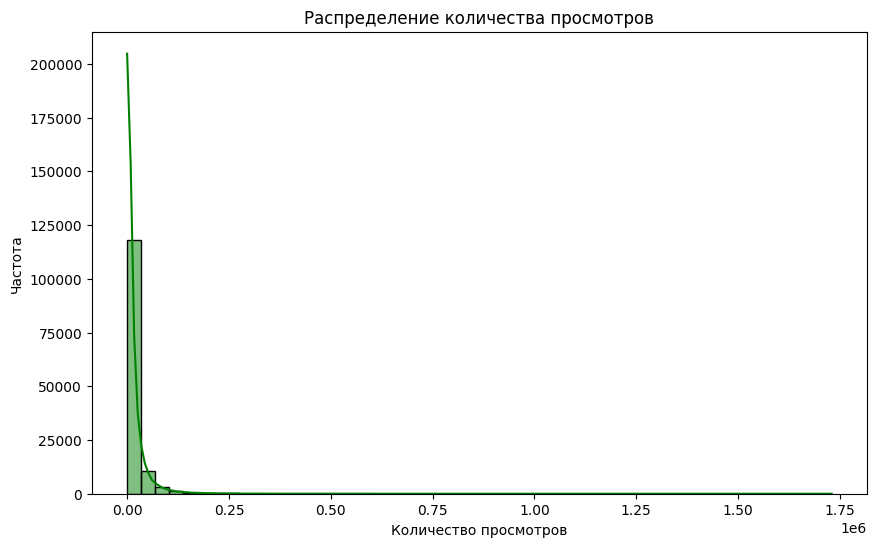

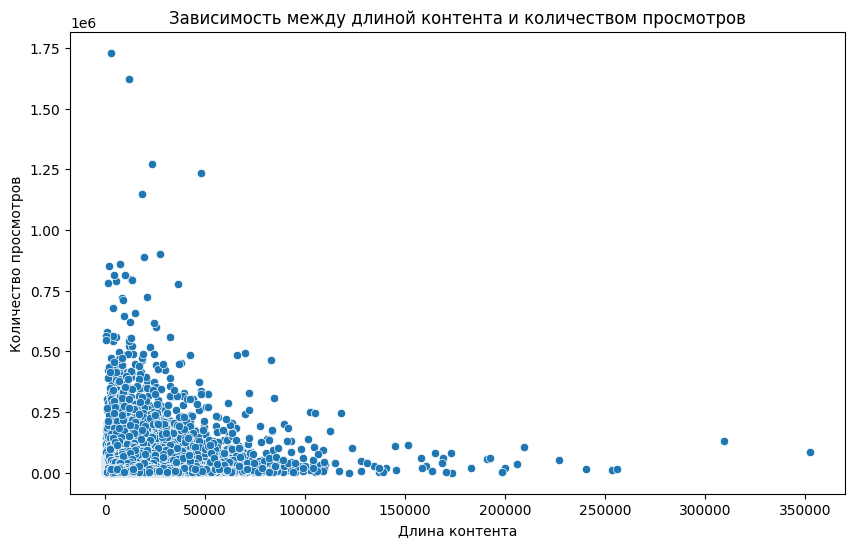

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['views'], bins=50, color = 'green', kde=True)
plt.title('Распределение количества просмотров')
plt.xlabel('Количество просмотров')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_len', y='views', data=df)
plt.title('Зависимость между длиной контента и количеством просмотров')
plt.xlabel('Длина контента')
plt.ylabel('Количество просмотров')
plt.show()


1. Гистограмма для числового признака views
2. Диаграмма рассеяния между двумя числовыми признаками content_len и views

Теперь наглядно видно распределение количества просмотров и можно выявить возможные аномалии или выбросы, основываясь на гистограмме. Диаграмма помогает увидеть зависимость между кол-вом тегов и кол-ом просмотров

2. Проверьте данные на нормальность(2-3 стобца)

 Для проверки нормальности используем Z, который проверяет, насколько далеко каждое значение отклоняется от среднего в стандартных отклонениях. Z-тест измеряет отклонения значений от среднего в терминах стандартных отклонений, что позволяет легко определить выбросы, особенно в случаях, когда данные распределены нормально. Это делает метод объективным и универсальным инструментом для анализа и обработки данных

In [ ]:
from scipy.stats import zscore

# вычисление Z-оценок для признака 'views'
views_zscores = zscore(df['views'])
views_outliers = np.sum(np.abs(views_zscores) > 3)  # количество значений с Z-оценками больше 3 стандартных отклонений

# вычисление Z-оценок для признака 'content_len'
contents_zscores = zscore(df['content_len'])
contents_outliers = np.sum(np.abs(contents_zscores) > 3)  # количество значений с Z-оценками больше 3 стандартных отклонений

print(f'Количество выбросов в данных для views: {views_outliers}')
print(f'Количество выбросов в данных для content_len: {contents_outliers}')


Количество выбросов в данных для views: 2178
Количество выбросов в данных для content_len: 2251


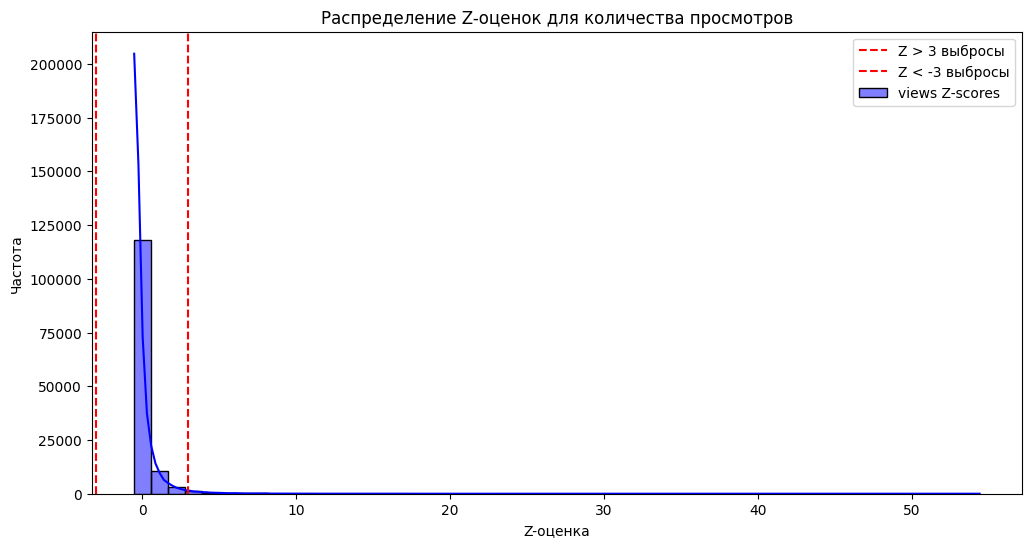

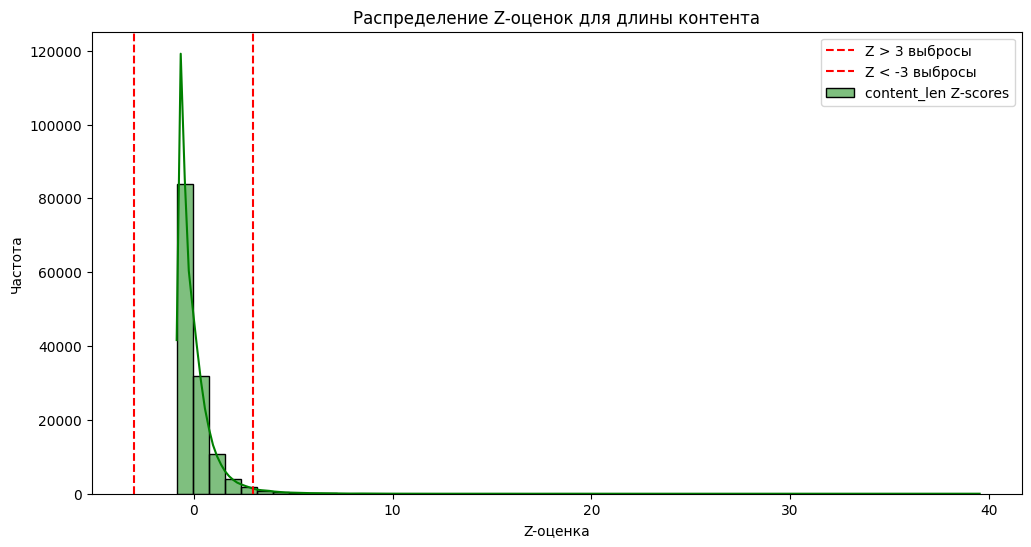

In [ ]:
# визуализация Z-оценок для 'views'
plt.figure(figsize=(12, 6))
sns.histplot(views_zscores, bins=50, kde=True, color='blue', label='views Z-scores')
plt.axvline(x=3, color='red', linestyle='--', label='Z > 3 выбросы')
plt.axvline(x=-3, color='red', linestyle='--', label='Z < -3 выбросы')
plt.title('Распределение Z-оценок для количества просмотров')
plt.xlabel('Z-оценка')
plt.ylabel('Частота')
plt.legend()
plt.show()

# визуализация Z-оценок для 'content_len'
plt.figure(figsize=(12, 6))
sns.histplot(contents_zscores, bins=50, kde=True, color='green', label='content_len Z-scores')
plt.axvline(x=3, color='red', linestyle='--', label='Z > 3 выбросы')
plt.axvline(x=-3, color='red', linestyle='--', label='Z < -3 выбросы')
plt.title('Распределение Z-оценок для длины контента')
plt.xlabel('Z-оценка')
plt.ylabel('Частота')
plt.legend()
plt.show()


Просмотры (views):

Большое количество выбросов в данных о просмотрах указывает на то, что есть множество статей, которые значительно отличаются по количеству просмотров от средней статьи. Эти выбросы могут быть как положительными (статьи с чрезвычайно высоким количеством просмотров), так и отрицательными (статьи с чрезвычайно низким количеством просмотров)

Длина контента (content_len):

Высокое количество выбросов в данных о длине контента указывает на большое разнообразие в длине статей. Это может означать, что на платформе хабра есть как очень короткие, так и очень длинные статьи, которые значительно отличаются от среднего значения

3. Выдвинете гипотезу(минимум 2), проверьте ее, не забывая объясняя свой выбор После каждой обработки данных/графика/теста обязательно вывод

<h3> Гипотеза 1: Связь между длиной контента и количеством просмотров

<b> Нулевая гипотеза (H0): </b> Длина контента не оказывает значительного влияния на количество просмотров

<b> Альтернативная гипотеза (H1): </b> Длина контента оказывает значительное влияние на количество просмотров

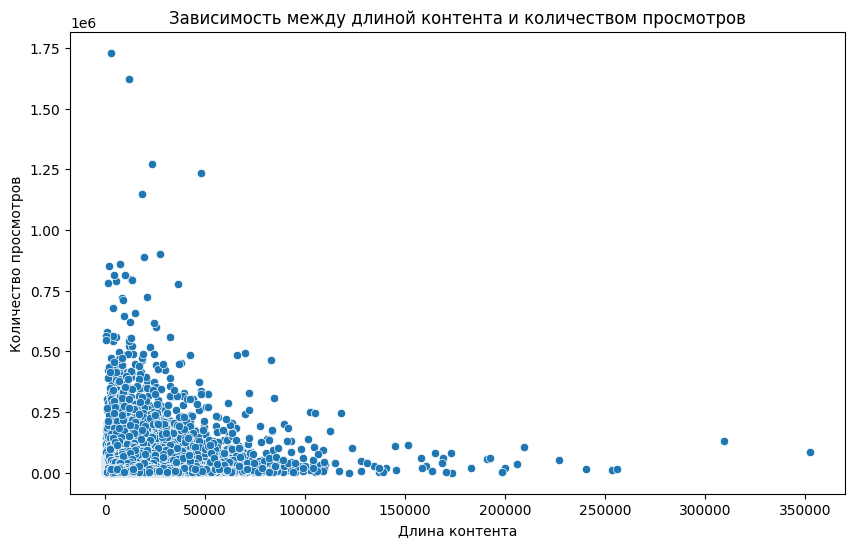

Коэффициент корреляции Пирсона для связи: 0.204
p-значение: 0.000
Отвергаем нулевую гипотезу. Длина контента оказывает значительное влияние на количество просмотров


In [ ]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_len', y='views', data=df)
plt.title('Зависимость между длиной контента и количеством просмотров')
plt.xlabel('Длина контента')
plt.ylabel('Количество просмотров')
plt.show()

correlation, p_value = pearsonr(df['content_len'].dropna(), df['views'].dropna())
print(f'Коэффициент корреляции Пирсона для связи: {correlation:.3f}')
print(f'p-значение: {p_value:.3f}')

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Длина контента оказывает значительное влияние на количество просмотров")
else:
    print("Не отвергаем нулевую гипотезу. Длина контента не оказывает значительного влияния на количество просмотров")


<b> Проверка гипотезы</b> построением диаграммы рассеяния для визуального анализа зависимости между длиной контента и количеством просмотров. Вычислим коэффициент корреляции Пирсона и проведем тест на значимость этой корреляции.

<b> Вывод: </b>

Диаграмма рассеяния показывает, существует ли видимая зависимость между длиной контента и количеством просмотров и если точки распределены по диагонали, то это указывает на наличие корреляции.
Таким образом, мы отвергаем нулевую гипотезу и делаем вывод, что длина контента оказывает значительное влияние на количество просмотров. Это означает, что в общем случае, увеличение длины контента может приводить к большему количеству просмотров.


<h3> Гипотеза 2: Влияние количества комментариев на количество просмотров

<b> Нулевая гипотеза (H0): </b> Количество комментариев не оказывает значительного влияния на количество просмотров

<b> Альтернативная гипотеза (H1): </b> Количество комментариев оказывает значительное влияние на количество просмотров

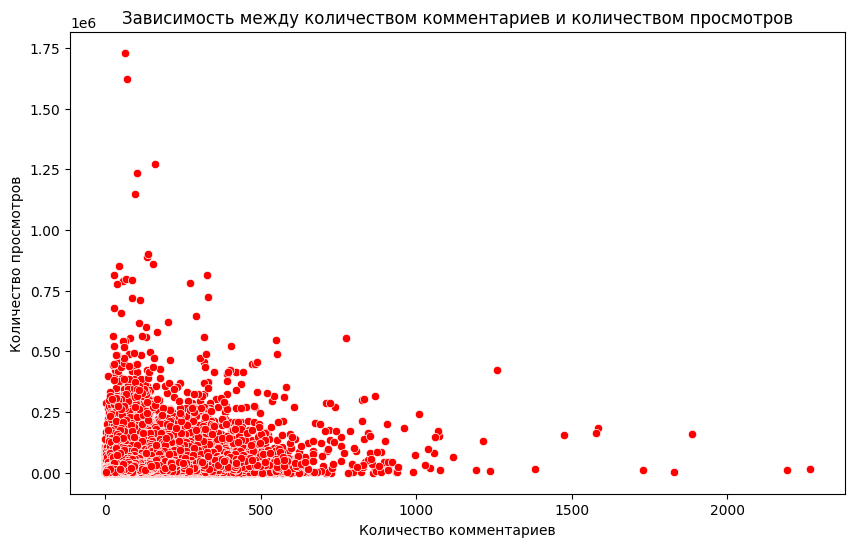

Коэффициент для комментариев: 0.290
p-значение для комментариев: 0.000
Отвергаем нулевую гипотезу. Количество комментариев оказывает значительное влияние на количество просмотров


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comments', y='views', color = 'red', data=df)
plt.title('Зависимость между количеством комментариев и количеством просмотров')
plt.xlabel('Количество комментариев')
plt.ylabel('Количество просмотров')
plt.show()

correlation_comments, p_value_comments = pearsonr(df['comments'].dropna(), df['views'].dropna())
print(f'Коэффициент для комментариев: {correlation_comments:.3f}')
print(f'p-значение для комментариев: {p_value_comments:.3f}')

if p_value_comments < 0.05:
    print("Отвергаем нулевую гипотезу. Количество комментариев оказывает значительное влияние на количество просмотров")
else:
    print("Не отвергаем нулевую гипотезу. Количество комментариев не оказывает значительного влияния на количество просмотров")


<b> Проверка гипотезы</b> построением диаграммы рассеяния для визуального анализа зависимости между степенью связи количества комментариев и количества просмотров. Вычислим коэффициент корреляции Пирсона и проведем тест на значимость этой корреляции.

<b> Вывод: </b>

Коэффициент равен 0.290 и указывает на умеренную положительную связь между количеством комментариев и количеством просмотров. P-значение < 0.05, поэтому мы отвергаем нулевую гипотезу и делаем вывод, что количество комментариев оказывает значительное влияние на количество просмотров. Это означает, что статьи с большим количеством комментариев получают больше просмотров